In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

%load_ext autoreload
%autoreload 2
from utils import show_heat_map, print_mutual_info, aggregate_data, resample_df, load_big_df
from utils import two_sig_signal, two_sig_signal_multi, get_yulu_df

In [17]:
df_raw = pd.read_csv("../simulation_data/output_2025-03-15_20250312_HYPEUSDTOB500_HYPEUSDTtrades_VX.csv")
df_buy, df_sell, df_ob = aggregate_data(df_raw)
df_ob

,mid,bidsize_1,bidsize_2,bidsize_3,bidsize_4,bidsize_5,asksize_1,asksize_2,asksize_3,asksize_4,asksize_5,bidprice_1,bidprice_2,bidprice_3,bidprice_4,bidprice_5,askprice_1,askprice_2,askprice_3,askprice_4,askprice_5
time,,,,,,,,,,,,,,,,,,,,,
2025-03-12 00:00:01.326999808,13.7955,83.67,127.86,184.08,385.43,480.86,42.68,182.43,235.09,863.29,902.17,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802
2025-03-12 00:00:01.426000128,13.7955,83.67,127.86,184.08,385.43,480.86,42.68,182.43,235.09,863.29,902.17,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802
2025-03-12 00:00:01.526000128,13.7955,83.16,127.35,183.57,302.93,398.36,43.51,183.26,235.92,864.12,903.00,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802
2025-03-12 00:00:01.625999872,13.7955,83.16,127.35,183.57,302.93,398.36,43.51,183.26,235.92,864.12,903.00,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802
2025-03-12 00:00:01.726000128,13.7955,83.16,122.39,178.61,297.97,359.74,43.51,183.26,235.92,864.12,903.00,13.795,13.793,13.792,13.790,13.789,13.796,13.798,13.799,13.801,13.802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-13 00:00:00.926000128,13.1725,20.09,180.46,611.29,842.98,1167.07,6.46,72.24,321.37,763.58,813.18,13.172,13.170,13.169,13.168,13.166,13.173,13.175,13.176,13.177,13.179
2025-03-13 00:00:01.026000128,13.1725,20.26,180.63,611.46,843.15,1167.24,6.46,52.24,301.37,743.58,793.18,13.172,13.170,13.169,13.168,13.166,13.173,13.175,13.176,13.177,13.179
2025-03-13 00:00:01.125999872,13.1725,20.26,180.63,611.46,843.15,1241.86,441.65,454.97,571.44,572.01,621.61,13.172,13.170,13.169,13.168,13.166,13.173,13.175,13.176,13.177,13.179


In [99]:
# create the sum of std of size feature
rolling_time_step = '10S'
sampling_step = '10S'


ddf = pd.DataFrame()
ddf1_bid = pd.DataFrame()
ddf1_ask = pd.DataFrame()

for i in range(1, 6):
    # ddf[f'bid{i}_max_diff'] = df_ob[f'bidsize_{i}'].rolling('10S').max() / (df_ob[f'bidsize_{i}'].rolling('10S').min() + 0.00001)
    ddf[f'bid{i}_max_diff'] = df_ob[f'bidsize_{i}'].rolling('10S').var() * (6 - i)
    ddf1_bid[f'mean_{i}'] = df_ob[f'bidsize_{i}'].rolling('10S').mean() * (6 - i)

for i in range(1, 6):
    # ddf[f'ask{i}_max_diff'] = df_ob[f'asksize_{i}'].rolling('10S').max() / (df_ob[f'asksize_{i}'].rolling('10S').min() + 0.00001)
    ddf[f'ask{i}_max_diff'] = df_ob[f'asksize_{i}'].rolling('10S').var() * (6 - i)
    ddf1_ask[f'mean_{i}'] = df_ob[f'asksize_{i}'].rolling('10S').mean() * (6 - i)

# x = 1 / (ddf.sum(axis=1) - 10)

ab_df['mid'] = df_ob['mid']
ab_df['size_max_diff'] = np.sqrt(ddf.sum(axis=1) / 15)

ab_df['max_diff_5'] = ddf[f'bid5_max_diff'] + ddf[f'ask5_max_diff']
ab_df['ratio5'] = (ddf1_bid[f'mean_5'] - ddf1_ask[f'mean_5']) / (ddf1_bid[f'mean_5'] + ddf1_ask[f'mean_5'])

ab_df['bid_mean_sum'] = ddf1_bid.sum(axis=1) / 15
ab_df['ask_mean_sum'] = ddf1_ask.sum(axis=1) / 15

ab_df['price_max_diff'] = (df_ob['mid'].rolling('3S').max() / (df_ob['mid'].rolling('3S').min() + 0.00001)) - 1

df = ab_df.resample(time_step).last()
df

,mid,size_max_diff,price_max_diff,bid_mean_sum,ask_mean_sum,max_diff_5,ratio5
time,,,,,,,
2025-03-12 00:00:01,13.7955,30.903006,-7.248735e-07,160.688381,289.169238,4378.629129,-0.392751
2025-03-12 00:00:02,13.7955,28.294854,-7.248735e-07,164.113569,295.824431,3444.248788,-0.382239
2025-03-12 00:00:03,13.7965,70.972466,7.176248e-05,195.592296,305.144914,8353.204684,-0.331616
2025-03-12 00:00:04,13.7965,80.812548,7.176248e-05,213.630486,313.192865,11647.043218,-0.287360
2025-03-12 00:00:05,13.7965,81.167848,7.176248e-05,204.920723,321.370738,11427.658557,-0.295648
...,...,...,...,...,...,...,...
2025-03-12 23:59:57,13.1810,188.543017,3.407579e-04,247.138237,533.675689,43697.317917,0.009733
2025-03-12 23:59:58,13.1790,208.116891,3.407579e-04,247.602738,509.968560,48174.820703,0.006940
2025-03-12 23:59:59,13.1745,228.489792,4.926179e-04,237.219966,479.447034,60974.577359,0.001923


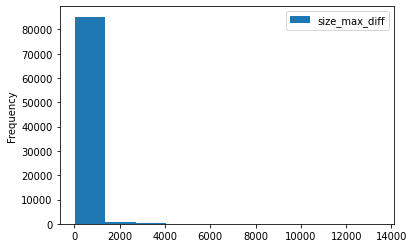

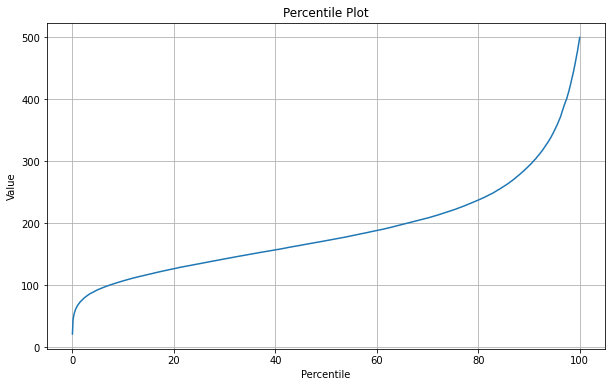

In [66]:
df[['size_max_diff']].plot(kind='hist')

data = df['size_max_diff'][df['size_max_diff'] < 500]
sorted_data = np.sort(data)
percentiles = np.linspace(0, 100, len(data))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(percentiles, sorted_data)
plt.xlabel('Percentile')
plt.ylabel('Value')
plt.title('Percentile Plot')
plt.grid(True)
plt.show()

In [101]:
df['return_1min'] = np.log(df['mid'].shift(-6) / df['mid']) * 10000.0
df['return_10s'] = np.log(df['mid'].shift(-1) / df['mid']) * 10000.0
df['ratio'] = (df['bid_mean_sum'] - df['ask_mean_sum']) / (df['bid_mean_sum'] + df['ask_mean_sum'])
df

,mid,size_max_diff,price_max_diff,bid_mean_sum,ask_mean_sum,max_diff_5,ratio5,return_1min,return_10s,ratio
time,,,,,,,,,,
2025-03-12 00:00:01,13.7955,30.903006,-7.248735e-07,160.688381,289.169238,4378.629129,-0.392751,0.724848,0.000000,-0.285603
2025-03-12 00:00:02,13.7955,28.294854,-7.248735e-07,164.113569,295.824431,3444.248788,-0.382239,0.724848,0.724848,-0.286367
2025-03-12 00:00:03,13.7965,70.972466,7.176248e-05,195.592296,305.144914,8353.204684,-0.331616,-2.537197,0.000000,-0.218783
2025-03-12 00:00:04,13.7965,80.812548,7.176248e-05,213.630486,313.192865,11647.043218,-0.287360,-1.449748,0.000000,-0.188986
2025-03-12 00:00:05,13.7965,81.167848,7.176248e-05,204.920723,321.370738,11427.658557,-0.295648,-2.174701,0.000000,-0.221265
...,...,...,...,...,...,...,...,...,...,...
2025-03-12 23:59:57,13.1810,188.543017,3.407579e-04,247.138237,533.675689,43697.317917,0.009733,NaN,-1.517451,-0.366973
2025-03-12 23:59:58,13.1790,208.116891,3.407579e-04,247.602738,509.968560,48174.820703,0.006940,NaN,-3.415106,-0.346325
2025-03-12 23:59:59,13.1745,228.489792,4.926179e-04,237.219966,479.447034,60974.577359,0.001923,NaN,-1.518199,-0.337991


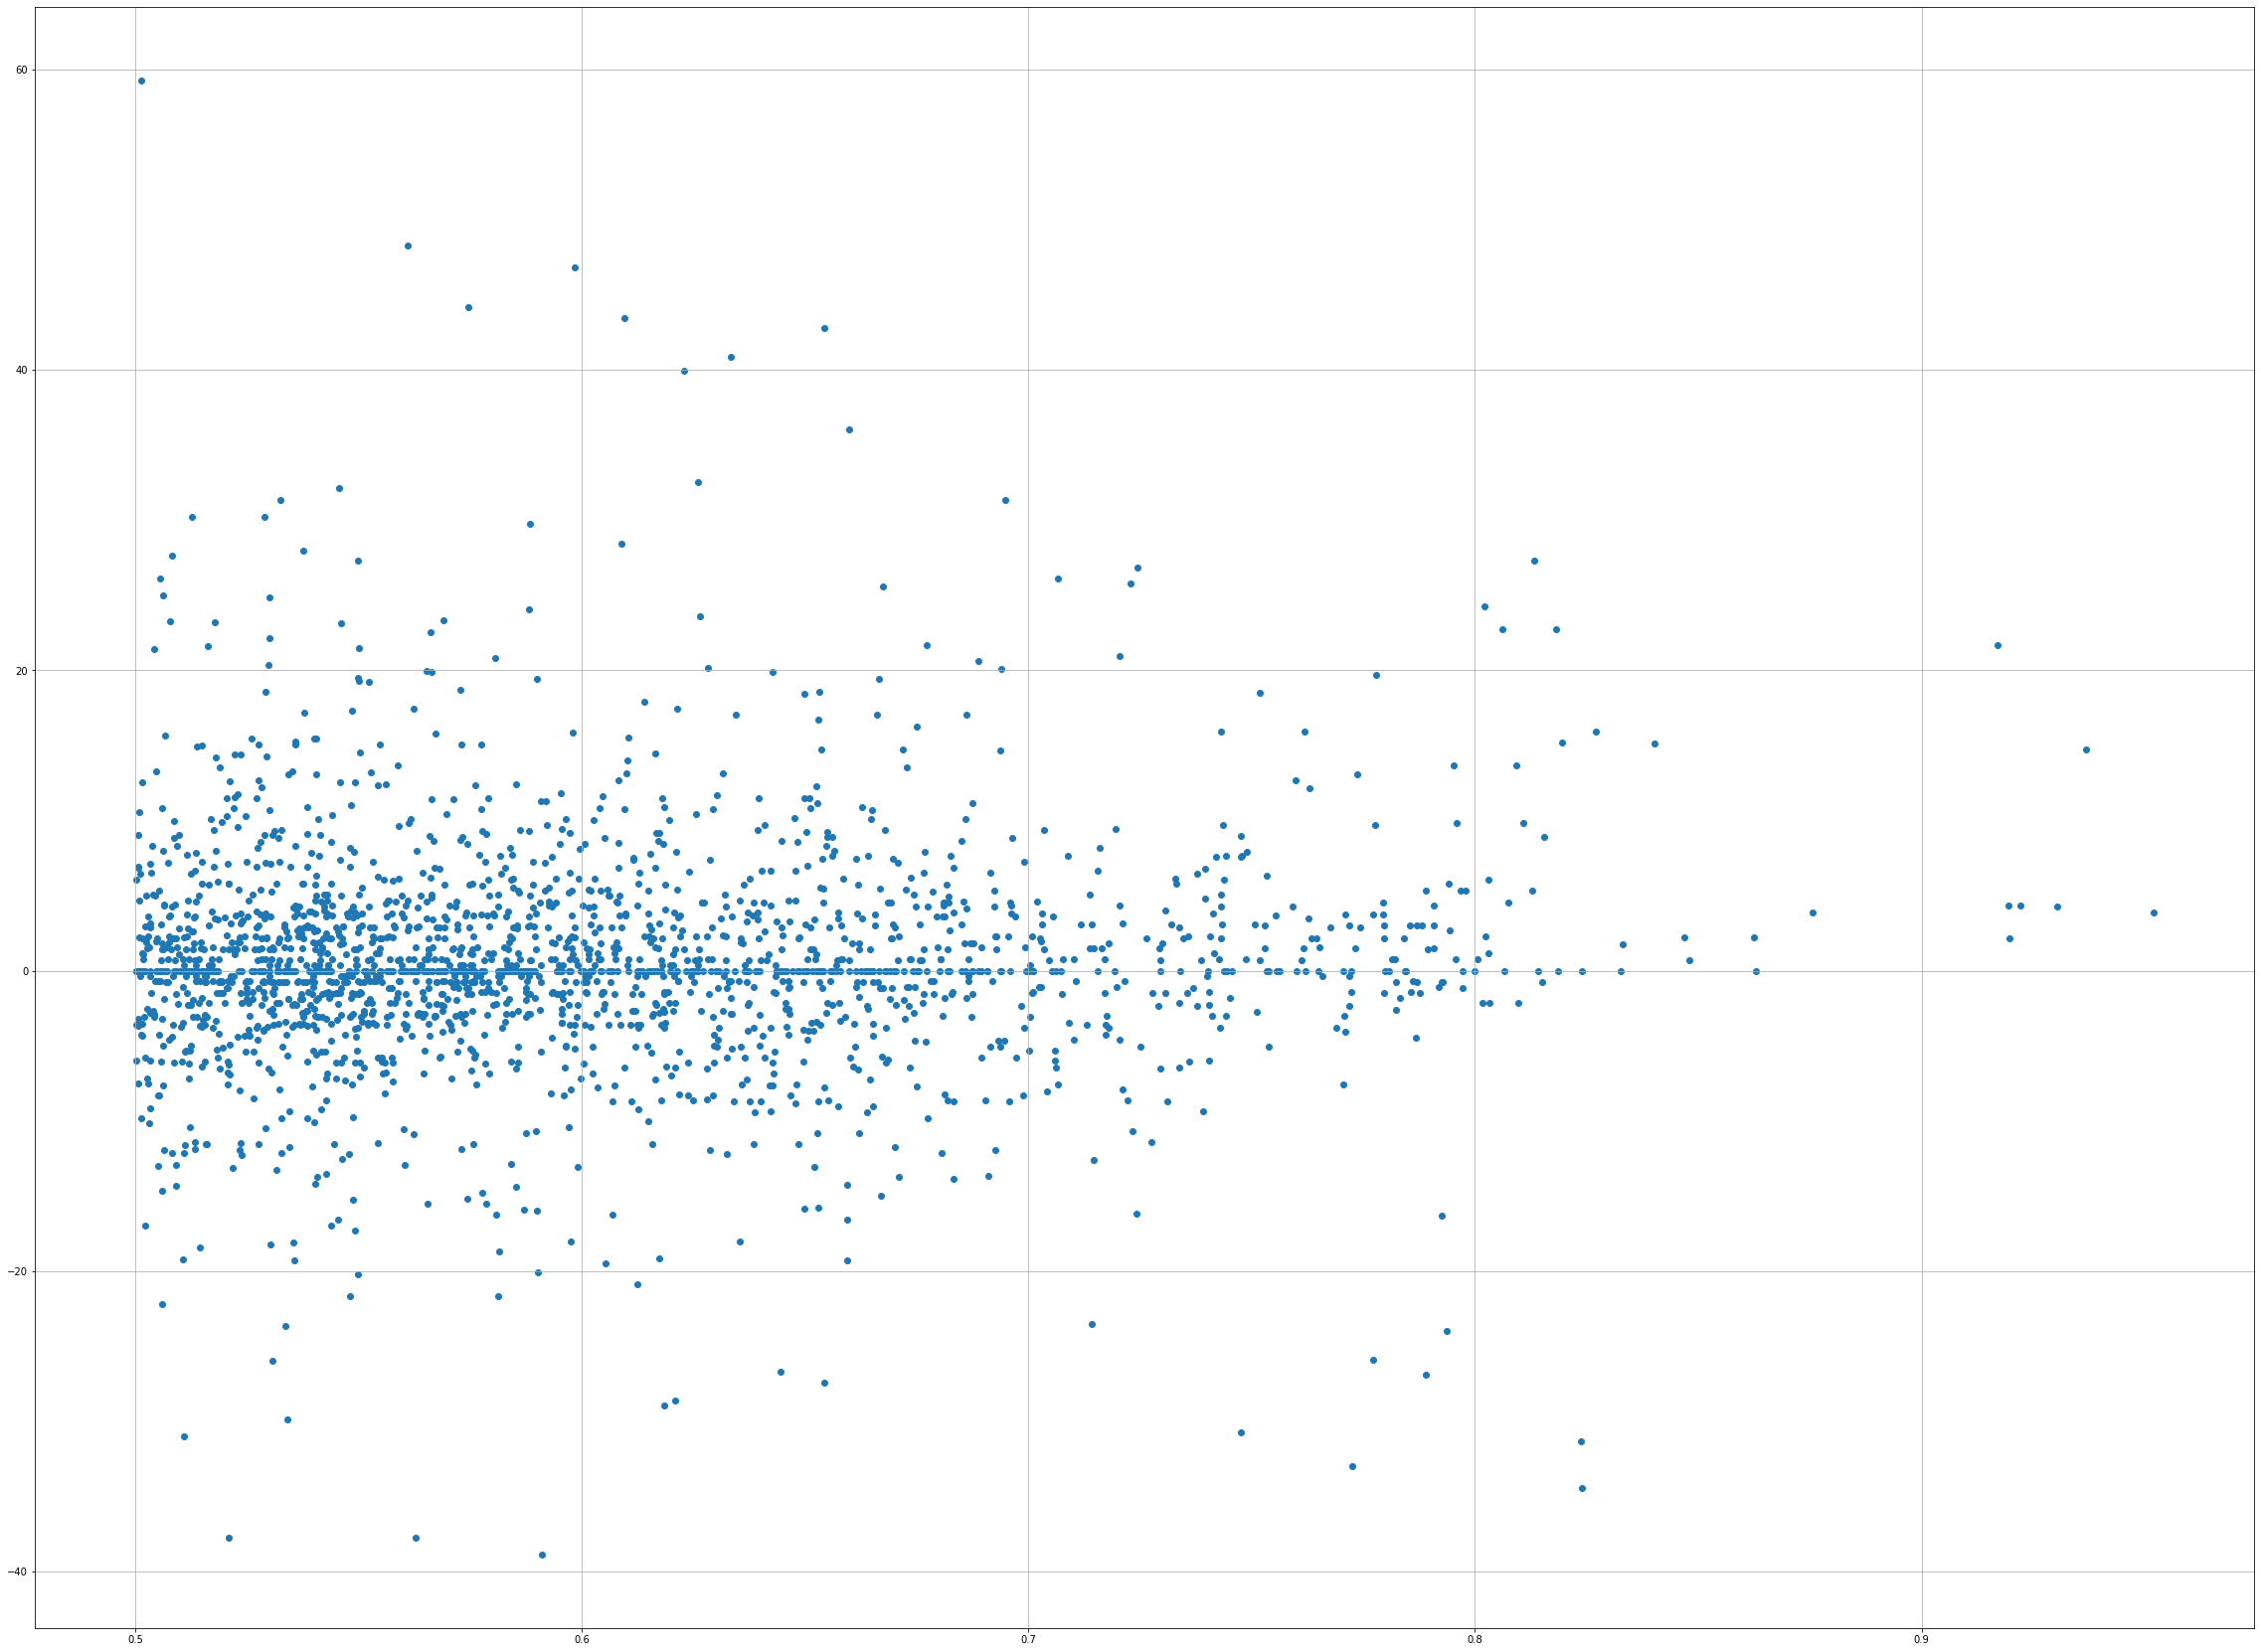

In [125]:
crits = [
    df['max_diff_5'] < 1.1 * 1e5,
    # df['price_max_diff'] < 0.004
    df['ratio5'] > 0.5
]

mask = pd.Series(True, index=df.index)
for crit in crits:
    mask = mask & crit

ddf = df[mask]
# ddf = df
plt.figure(figsize=(40, 30))
plt.scatter(x= ddf['ratio5'], y=ddf['return_1min'])
plt.grid(True)
plt.show()

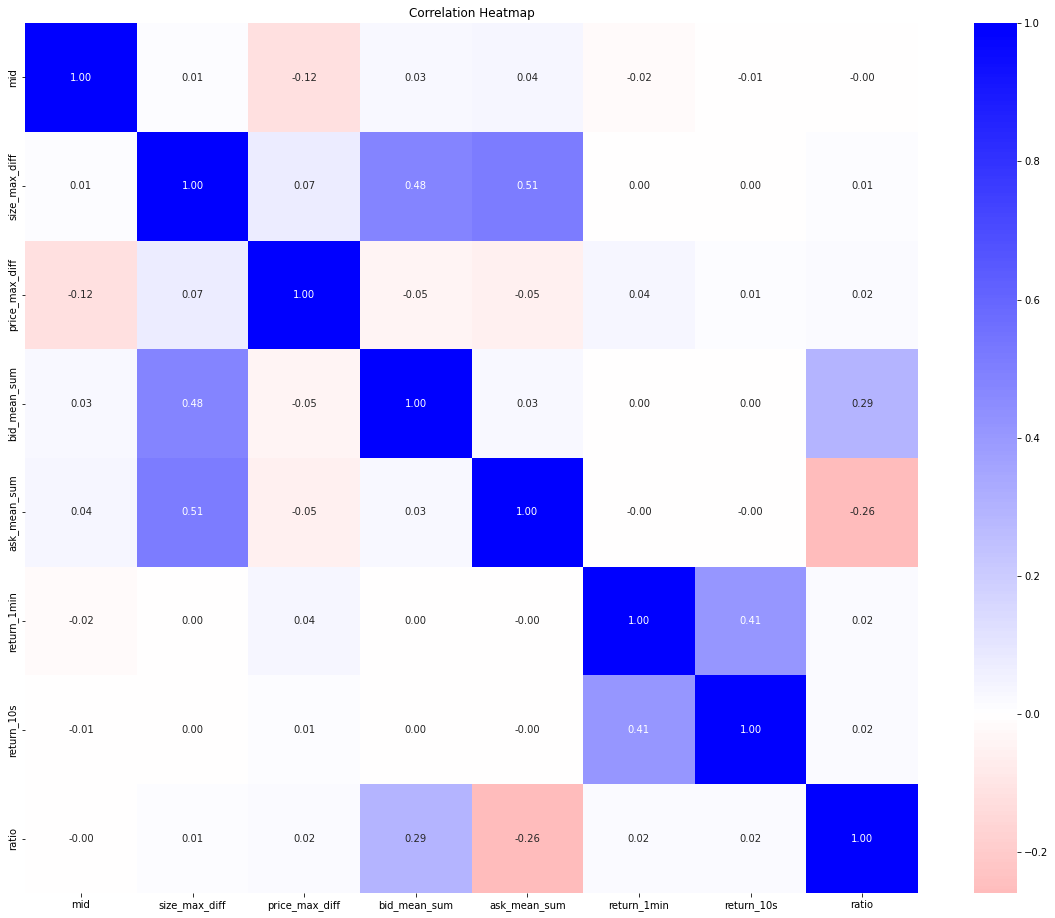

In [96]:
# create the sum of std of size feature
# create the price largest diff feature
# create the time weighted imbalance feature
show_heat_map(df)

<Axes: ylabel='Frequency'>

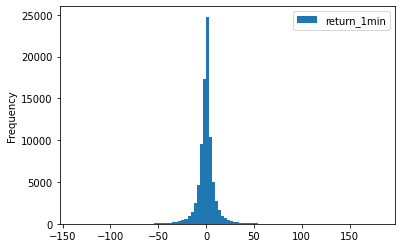

In [130]:
df[['return_1min']].plot(kind='hist', bins=100)